## **1.** Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings("ignore")

## **2.** Reading csv

In [2]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [3]:
df = df.drop('Unnamed: 0',axis=1)
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


# **3.** Extract The **X** and **Y** variables

In [4]:
x = df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

### Apply SMOTENN

In [31]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

# **4.** Train Test Split

In [32]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Now Apply Machine Learning Algorithms

### **1(a).** **DecisionTree**

#### First Find the best parameters to apply on the algorithm. We will use GridSearch.

In [16]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', n_jobs=8)
grid_search.fit(xr_train, yr_train)
best_dt = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [55]:
dt = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=4, max_depth=10,criterion='gini')
cv_scores = cross_val_score(dt, xr_train, yr_train, cv=5, n_jobs=8)
dt_accuracy = np.mean(cv_scores)
dt.fit(xr_train, yr_train) 
y_pred_dt = dt.predict(xr_test)

In [56]:
precision_dt = precision_score(yr_test, y_pred_dt, average='weighted')
recall_dt = recall_score(yr_test, y_pred_dt, average='weighted')
f1_score_dt = f1_score(yr_test, y_pred_dt, average='weighted')
confusion_matrix_dt = confusion_matrix(yr_test, y_pred_dt)

# **2.** Random Forest Classifier

In [23]:
param_distributions = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', n_jobs=8,cv=5)
grid_search.fit(xr_train, yr_train)
best_rf = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [57]:
rf = RandomForestClassifier(min_samples_split=5, min_samples_leaf=1, max_depth=None, criterion='gini', max_features='sqrt')

cv_scores = cross_val_score(rf, xr_train, yr_train, cv=5, n_jobs=8)
rf_accuracy = np.mean(cv_scores)
rf.fit(xr_train, yr_train) 
y_pred_rf = rf.predict(xr_test)

In [58]:
precision_rf = precision_score(yr_test, y_pred_rf, average='weighted')
recall_rf = recall_score(yr_test, y_pred_rf, average='weighted')
f1_score_rf = f1_score(yr_test, y_pred_rf, average='weighted')
confusion_matrix_rf = confusion_matrix(yr_test, y_pred_rf)

# **3.** SVM

In [35]:
svm = SVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.001, 0.01, 0.1, 1]}

rand_search = RandomizedSearchCV(svm, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
rand_search.fit(xr_train, yr_train)

best_model = rand_search.best_estimator_
print("Best hyperparameters:", best_model.get_params())

Best hyperparameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [59]:
svm = SVC(C=100, decision_function_shape='ovr', degree=3, gamma=0.01,kernel="rbf", max_iter=-1)
cv_scores = cross_val_score(svm, xr_train, yr_train, cv=5, n_jobs=8)
svm_accuracy = np.mean(cv_scores)
svm.fit(xr_train, yr_train) 
y_pred_svm = svm.predict(xr_test)

In [60]:
precision_svm = precision_score(yr_test, y_pred_svm, average='weighted')  # or 'macro', 'micro', etc.
recall_svm = recall_score(yr_test, y_pred_svm, average='weighted')
f1_score_svm = f1_score(yr_test, y_pred_svm, average='weighted')
confusion_matrix_svm = confusion_matrix(yr_test, y_pred_svm)

# **4.** Logistic Regression

In [40]:
lr = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'sag', 'liblinear', 'saga', 'newton-cg', 'newton-cholesky'],
    'penalty': ['l1', 'l2'],  
    'max_iter': [100, 200, 300],  
    'class_weight': [None, 'balanced'],  
    'warm_start': [True, False]
}


grid_search = GridSearchCV(lr, param_grid, scoring='accuracy', n_jobs = -1, cv = 5)
grid_search.fit(xr_train, yr_train)

best_model = grid_search.best_estimator_
print("Best hyperparameters:", best_model.get_params())

Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [61]:
lr = LogisticRegression(C=10, class_weight='balanced', max_iter=100,penalty='l1', solver='liblinear',warm_start=False)
cv_scores = cross_val_score(lr, xr_train, yr_train, cv=5, n_jobs=8)
lr_accuracy = np.mean(cv_scores)
lr.fit(xr_train, yr_train) 
y_pred_lr = lr.predict(xr_test)

In [62]:
precision_lr = precision_score(yr_test, y_pred_lr, average='weighted')  # or 'macro', 'micro', etc.
recall_lr = recall_score(yr_test, y_pred_lr, average='weighted')
f1_score_lr = f1_score(yr_test, y_pred_lr, average='weighted')
confusion_matrix_lr = confusion_matrix(yr_test, y_pred_lr)

### Compare the models

In [63]:
model_metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Precision': [precision_lr, precision_svm, precision_dt, precision_rf],
    'Recall': [recall_lr, recall_svm, recall_dt, recall_rf],
    'F1-Score': [f1_score_lr, f1_score_svm, f1_score_dt, f1_score_rf],
    'Accuracy': [lr_accuracy, svm_accuracy, dt_accuracy, rf_accuracy]
}
df = pd.DataFrame(model_metrics)
df

,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.934667,0.934579,0.934606,0.946004
1,SVM,0.985604,0.985556,0.985562,0.981079
2,Decision Tree,0.935422,0.935429,0.935382,0.939411
3,Random Forest,0.951641,0.951572,0.951522,0.952591


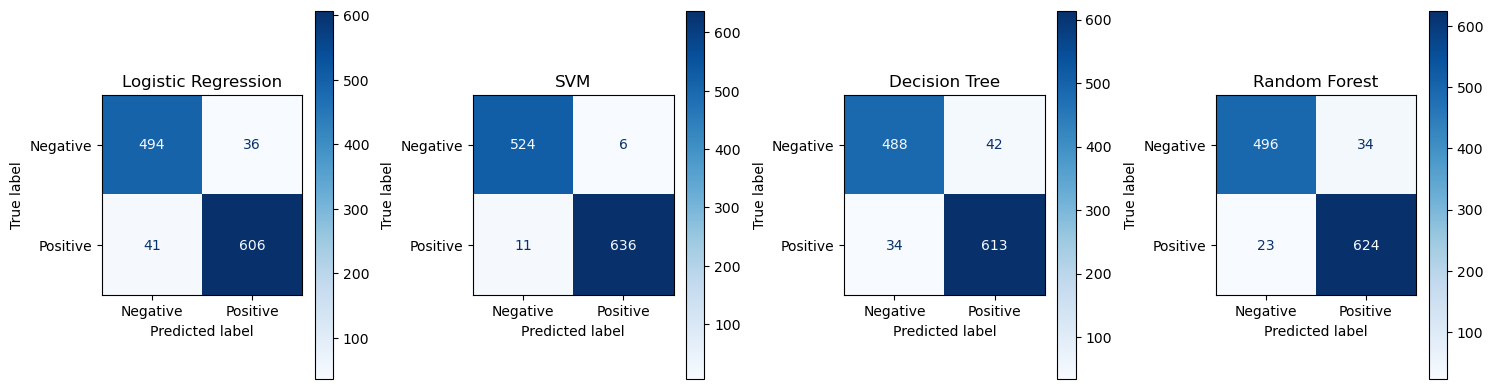

In [64]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Plot confusion matrices
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=['Negative', 'Positive'])
disp1.plot(ax=axes[0], cmap=plt.cm.Blues)
disp1.ax_.set_title('Logistic Regression')

disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=['Negative', 'Positive'])
disp2.plot(ax=axes[1], cmap=plt.cm.Blues)
disp2.ax_.set_title('SVM')

disp3 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=['Negative', 'Positive'])
disp3.plot(ax=axes[2], cmap=plt.cm.Blues)
disp3.ax_.set_title('Decision Tree')

disp4 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=['Negative', 'Positive'])
disp4.plot(ax=axes[3], cmap=plt.cm.Blues)
disp4.ax_.set_title('Random Forest')

plt.tight_layout()
plt.show()


### Pickel The model

In [87]:
import pickle
filename = 'model.sav'
pickle.dump(svm, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r1 = load_model.score(xr_test, yr_test)
model_score_r1

0.9631533847472151